In [1]:
#%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
#import math
from datetime import date, timedelta
#from datetime import datetime
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot

In [2]:
print (os.getcwd())
#os.chdir('..\data')

c:\Users\Administrator\repos\jupyter\plotly


In [3]:
#------------------------------------------------------------------------------
"""today = date.today()
# YYmmdd
d1 = today.strftime("%Y%m%d")
print("d1 =", d1)"""
#today = date.today().strftime("%Y%m%d")
#prev_day
today = (date.today() - timedelta(days=0)).strftime("%Y%m%d") #return prev date

In [11]:
server='q2.open-broker.ru'
# path = os.getcwd()+'\QUIK_STAT_html'

In [14]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f_txtfiles(today):
    txtfiles = []
    for file in glob.glob(".\\data\\ITERATIONS*"+server+"*_"+today+"*.txt"):
            txtfiles.append(file)
    return txtfiles
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [15]:
#------------------------------------------------------------------------------
txtfiles=f_txtfiles(today=today)
print(txtfiles)
#------------------------------------------------------------------------------

['.\\data\\ITERATIONS_IPCOMMENT_q2.open-broker.ru_s_IPADDRESS_10.55.150.10_UID_231305_20220804_111424_FR.txt']


In [16]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f_df_append(txtfiles):
    file=0
    if len(txtfiles)>1:
        while (file<len(txtfiles)):
            try:
                df
            except:
                df=pd.read_csv(txtfiles[file],sep=';',header=0)
                file=+1
                #print('except file='+str(file))
            #print('next')
            df_temp=pd.read_csv(txtfiles[file],sep=';',header=0)
            df=df.append(df_temp)
            file=file+1
            #print('file='+str(file))
    elif len(txtfiles)==1:
        df=pd.read_csv(txtfiles[file],sep=';',header=0)  
    return df
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [17]:
#------------------------------------------------------------------------------
df=f_df_append(txtfiles)
#------------------------------------------------------------------------------

In [18]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f_df_transform(df):
    df=df.reset_index()
    del df['index']
    #df=df[df['delta_time']<10]
    df[['date','local_time']]=df[['date','local_time']].astype(str)
    df['len_local_time']=df.local_time.map(len)
    df.loc[df['len_local_time']==5,'local_time']='0'+df['local_time']
    df.loc[df['len_local_time']==4,'local_time']='00'+df['local_time']
    df.loc[df['len_local_time']==3,'local_time']='000'+df['local_time']
    df.loc[df['len_local_time']==2,'local_time']='0000'+df['local_time']
    df.loc[df['len_local_time']==1,'local_time']='00000'+df['local_time']
    del df['len_local_time']
    df['date_time']=df['date']+' '+df['local_time']
    df['date_time']=pd.to_datetime(df['date_time'],format='%Y%m%d %H%M%S')
    df=df.set_index('date_time')
    df['date_time']=df.index
    df.index.name=None
    df=df.sort_values(by=['date_time'])
    df['seconds']=df.delta_time
    df=df.drop(['delta_time'],axis=1)
    df['Market']=df.Stock
    df=df.drop(['Stock'],axis=1)
    return df
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [19]:
#------------------------------------------------------------------------------
df=f_df_transform(df)
#------------------------------------------------------------------------------

In [20]:
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def f_stat(df):
    market_list=df.Market.unique()
    for i in market_list:
        stat=df[df.Market==i]
        print(i)
        print(stat.describe().seconds)
    return stat.describe().seconds
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [21]:
#------------------------------------------------------------------------------
stat=f_stat(df)
#stat[0:]=round(stat[0:],6)
#stat[0:][:]
#stat[:][:].to_csv(path+'\QUIK_STAT_ITERATIONS_'+server+'_'+today+'.txt',sep=':',header=False)
#------------------------------------------------------------------------------

FR
count    800.000000
mean       0.013196
std        0.009668
min        0.003000
25%        0.007000
50%        0.013000
75%        0.016000
max        0.125000
Name: seconds, dtype: float64


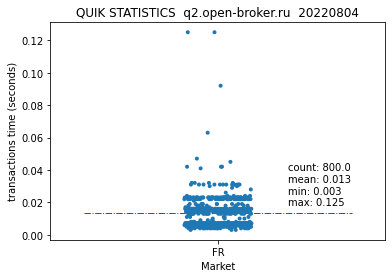

In [22]:
p = sns.stripplot( x="Market", y="seconds", data=df, size=4, dodge=True )
#plt.xticks(rotation=45, ha="right")
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            #meanprops={'color': 'purple', 'ls': '-', 'lw': 2},
            meanprops={'linestyle': '-.','lw': 1,'color':'brown'},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=2,
            x="Market",
            y="seconds",
            data=df,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.ylabel('transactions time (seconds)')
plt.title('QUIK STATISTICS  '+server+'  '+today)
#plt.text(x=0.51,y=0.08,s="An annotation")
plt.text(
         x=0.21
        ,y=round(stat[1],3)+round(stat[1],3)/100*40
        ,s=(str(stat.index[0])+": "+str(round(stat[0],0))+"\n"+
         str(stat.index[1])+": "+str(round(stat[1],3))+"\n"+
         str(stat.index[3])+": "+str(round(stat[3],3))+"\n"+
         str(stat.index[7])+": "+str(round(stat[7],3)))
        )
plt.savefig( 'QUIK_STAT_ITERATIONS_'+server+'_'+today+'.png',dpi=100)